In [1]:
# time series within pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime

In [5]:
my_year=2017
my_month=1
my_day=2
my_hour=13
my_min=30
my_second=15

In [6]:
my_datetime = datetime(my_year, my_month, my_day, my_hour, my_min, my_second)

In [7]:
my_datetime

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [8]:
my_datetime.hour

13

In [9]:
#pandas with datetime

In [10]:
df = pd.DataFrame({
    'date': ['3/1/2000', '3/2/2000', '3/12/2000'],
    'value': [2, 3,4]})
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date']

0   2000-03-01
1   2000-03-02
2   2000-03-12
Name: date, dtype: datetime64[ns]

In [12]:
list_of_days = ['2016/1/1', '2016/1/2', '2016/1/3', '2016/1/4', '2016/1/5', '2016/1/6']

In [13]:
dt_ind = pd.DatetimeIndex(list_of_days)
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq=None)

In [14]:
data = np.random.randn(6, 2)
print(data)

[[-1.49407849 -1.21651916]
 [-1.93872208  0.72034549]
 [-0.52510619  0.60209535]
 [ 0.70265548 -0.06193614]
 [ 1.62974784  2.36098985]
 [-0.54427496 -1.24249134]]


In [15]:
cols = ['A', 'B']

In [16]:
df = pd.DataFrame(data, index=dt_ind, columns=cols )

In [17]:
df

,A,B
2016-01-01,-1.494078,-1.216519
2016-01-02,-1.938722,0.720345
2016-01-03,-0.525106,0.602095
2016-01-04,0.702655,-0.061936
2016-01-05,1.629748,2.360990
2016-01-06,-0.544275,-1.242491


In [18]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq=None)

In [19]:
df.index.max()

Timestamp('2016-01-06 00:00:00')

In [20]:
df.index.min()

Timestamp('2016-01-01 00:00:00')

In [21]:
df[df.index > datetime(2016, 1, 3)]

,A,B
2016-01-04,0.702655,-0.061936
2016-01-05,1.629748,2.360990
2016-01-06,-0.544275,-1.242491


In [22]:
df[df.index > pd.Timestamp('2016-01-03')]

,A,B
2016-01-04,0.702655,-0.061936
2016-01-05,1.629748,2.360990
2016-01-06,-0.544275,-1.242491


In [23]:
df.sort_index(ascending=False, inplace=True)

In [24]:
df

,A,B
2016-01-06,-0.544275,-1.242491
2016-01-05,1.629748,2.360990
2016-01-04,0.702655,-0.061936
2016-01-03,-0.525106,0.602095
2016-01-02,-1.938722,0.720345
2016-01-01,-1.494078,-1.216519


In [25]:
# rolling & Expanding

In [26]:
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)

In [27]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


<AxesSubplot:xlabel='Date'>

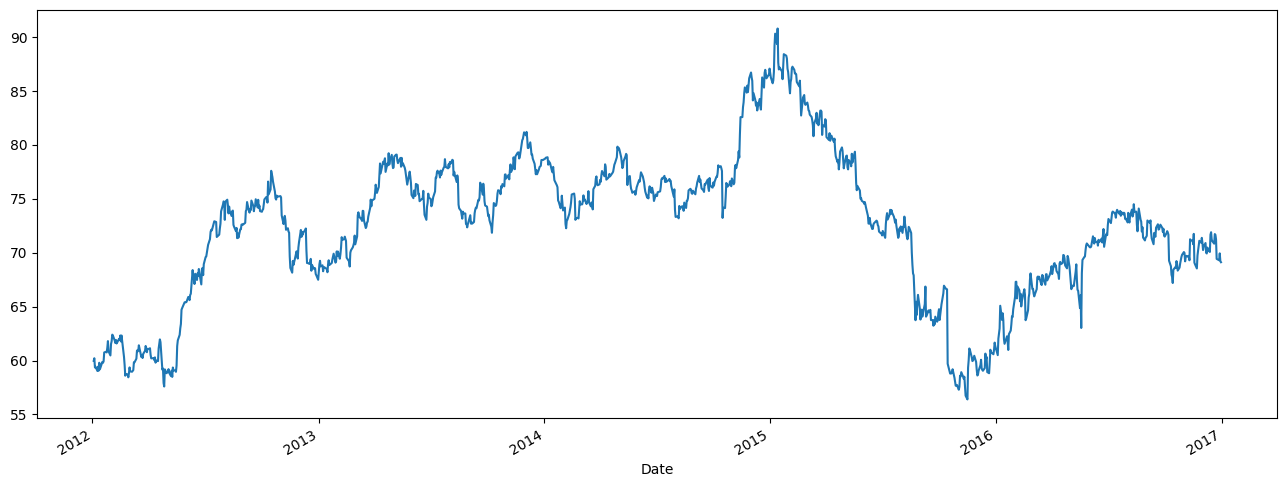

In [28]:
df['Open'].plot(figsize=(16, 6))

In [30]:
rolling_window = 7
df.rolling(rolling_window).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

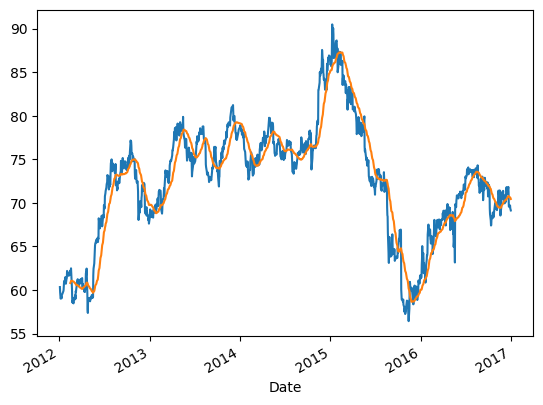

In [32]:
df['Close'].plot()
df.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

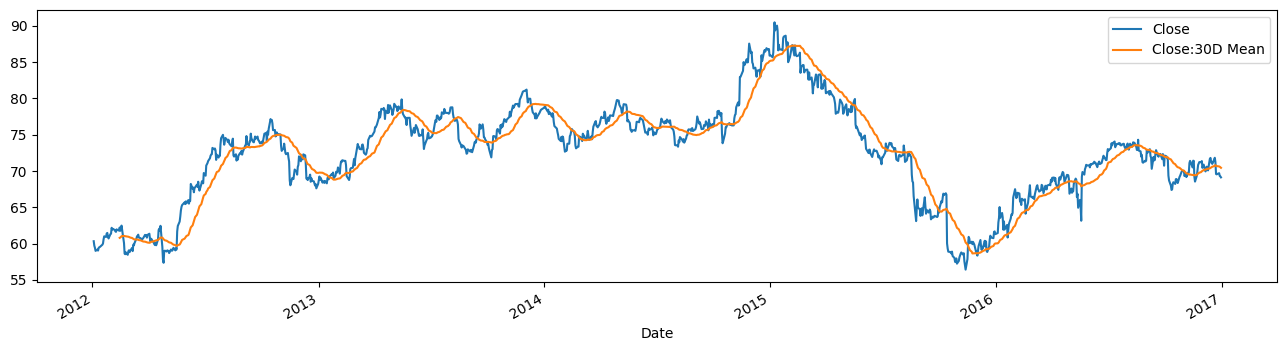

In [35]:
df['Close:30D Mean']=df['Close'].rolling(30).mean()
df[['Close', 'Close:30D Mean']].plot(figsize=(16, 4))

In [36]:
#expanding

In [38]:
df['expanding_close']=df['Close'].expanding(1).mean()
df.head()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close
Date,,,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,NaN,60.330002
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,NaN,60.020001
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,NaN,59.820000
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,NaN,59.615000
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,NaN,59.528000


<AxesSubplot:xlabel='Date'>

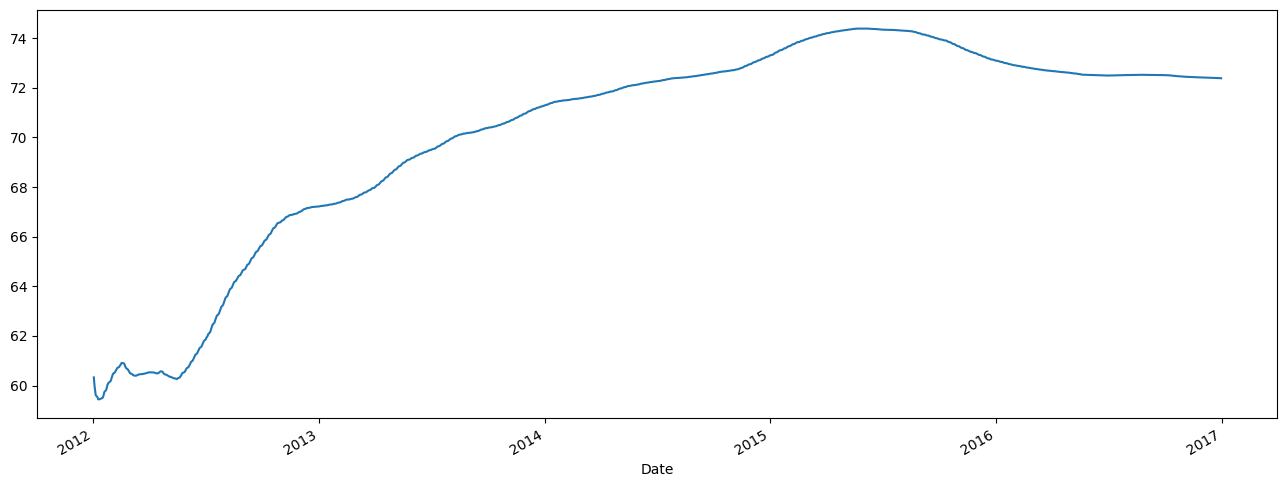

In [39]:
df['expanding_close'].plot(figsize=(16, 6))

In [40]:
#billinger bands

<AxesSubplot:xlabel='Date'>

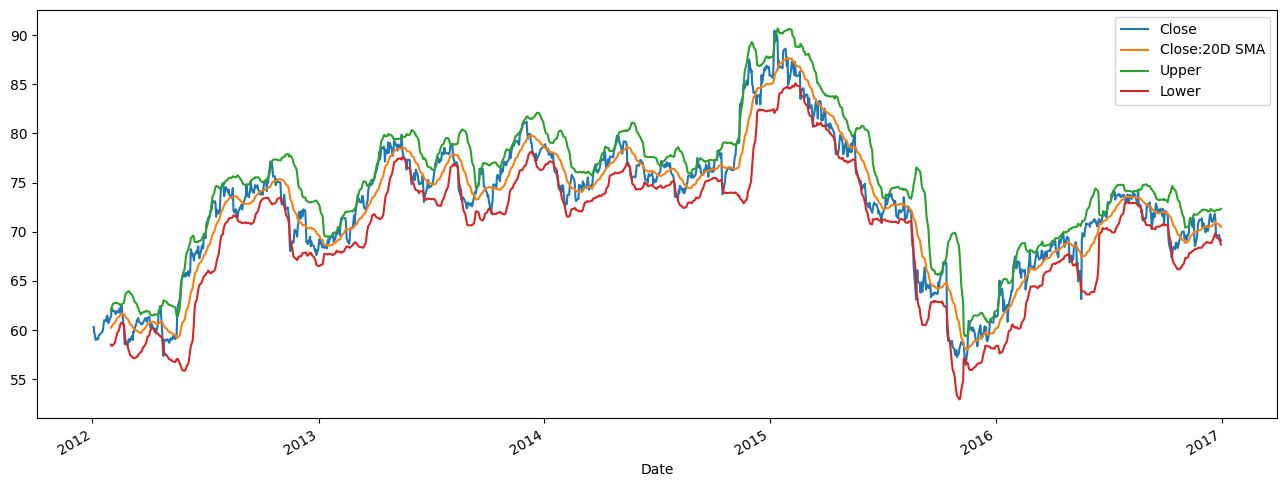

In [44]:
df['Close:20D SMA']=df['Close'].rolling(window=20).mean()
df['Upper']=df['Close:20D SMA'] + 2*df['Close'].rolling(window=20).std()
df['Lower']=df['Close:20D SMA'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close:20D SMA', 'Upper', 'Lower']].plot(figsize=(16, 6))


## time resampling

In [48]:
df.resample(rule='QS').max()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2012-01-01,62.400002,62.630001,61.910000,62.480000,28630200,54.494442,61.060333,60.915151,61.680000,63.956755,60.750574
2012-04-01,68.940002,69.720001,68.559998,69.720001,38007300,61.631517,66.622667,61.798480,67.601500,69.754297,65.448702
2012-07-01,74.959999,75.239998,74.449997,75.139999,17813200,66.781948,73.438000,65.610798,74.102500,75.755937,72.953096
2012-10-01,77.599998,77.599998,76.690002,77.150002,23401900,68.568371,74.997334,67.215120,75.369000,77.910776,73.474621
2013-01-01,74.930000,75.110001,74.430000,74.849998,25683700,67.324929,72.382333,67.952710,73.436499,75.264300,71.642647
2013-04-01,79.230003,79.959999,78.900002,79.860001,14564500,72.262093,78.390667,69.481364,78.589500,80.352737,77.584618
2013-07-01,78.680000,79.000000,78.430000,78.769997,14972300,71.275793,77.423667,70.379658,77.887000,80.405096,76.919744
2013-10-01,81.209999,81.370003,80.820000,81.209999,10633700,73.929868,79.239667,71.283964,79.816500,82.108269,78.163494
2014-01-01,78.860001,79.470001,78.519997,78.910004,17160200,72.254228,79.102000,71.723126,78.543500,80.314522,77.169703


In [49]:
def last_day(entry):
    return entry[-1]

In [50]:
df.resample(rule='A').apply(last_day)

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2012-12-31,67.489998,68.300003,67.370003,68.230003,7012500,60.977077,69.739333,67.215120,69.711000,72.897999,66.524001
2013-12-31,78.660004,78.870003,78.349998,78.690002,3859100,72.052783,79.112334,71.283964,78.658500,80.791442,76.525558
2014-12-31,87.080002,87.440002,85.860001,85.879997,4151400,80.606085,85.121668,73.303780,85.007501,87.689793,82.325209
2015-12-31,61.330002,61.720001,61.169998,61.299999,6555100,59.135363,60.018667,73.100209,60.118500,61.912716,58.324284
2016-12-31,69.120003,69.430000,68.830002,69.120003,6889500,68.615479,70.439000,72.388450,70.511500,72.330838,68.692162


Text(0.5, 1.0, 'Yearly Mean Close Price for WMT')

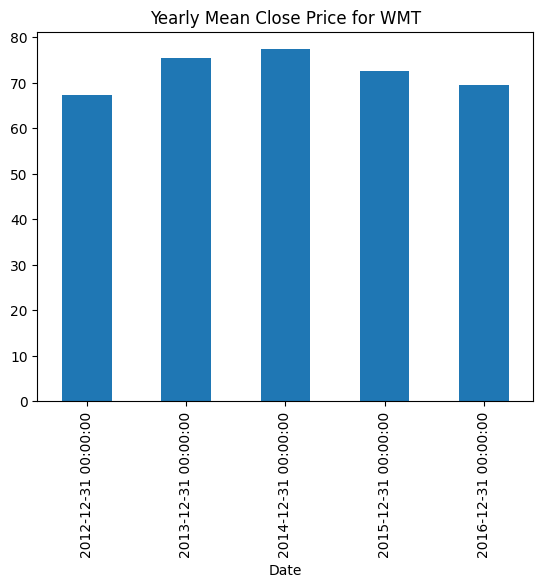

In [53]:
df['Close'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean Close Price for WMT')

Text(0.5, 1.0, 'Monthly Max Opening Price for WMT')

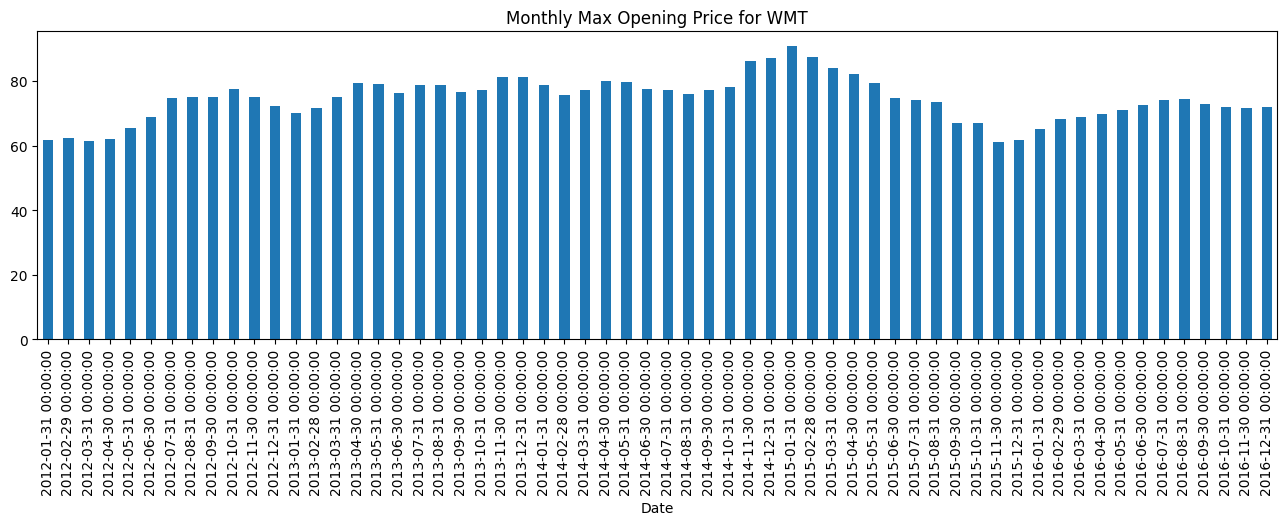

In [54]:
df['Open'].resample('M').max().plot(kind='bar', figsize=(16, 4))
plt.title('Monthly Max Opening Price for WMT')

In [55]:
## time shift

In [57]:
df.head(20)

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,NaN,60.330002,NaN,NaN,NaN
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,NaN,60.020001,NaN,NaN,NaN
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,NaN,59.820000,NaN,NaN,NaN
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,NaN,59.615000,NaN,NaN,NaN
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,NaN,59.528000,NaN,NaN,NaN
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109,NaN,59.446667,NaN,NaN,NaN
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098,NaN,59.440000,NaN,NaN,NaN
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316,NaN,59.447500,NaN,NaN,NaN
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204,NaN,59.457778,NaN,NaN,NaN


In [58]:
df.tail(10)

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2016-12-16,71.070000,71.639999,70.599998,70.980003,17844800,70.461903,70.592000,72.404732,70.641001,72.216789,69.065212
2016-12-19,70.839996,71.750000,70.839996,71.580002,5889300,71.057522,70.672667,72.404072,70.793001,72.074465,69.511536
2016-12-20,71.730003,71.930000,71.510002,71.820000,6108100,71.295768,70.740667,72.403605,70.915501,72.087983,69.743018
2016-12-21,71.660004,72.000000,71.239998,71.239998,5101000,70.720000,70.789000,72.402676,70.971500,72.089738,69.853263
2016-12-22,71.239998,71.239998,69.209999,69.589996,12106800,69.082042,70.738667,72.400431,70.909500,72.186941,69.632059
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411,70.677000,72.398150,70.825000,72.230351,69.419648
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240,70.626000,72.396000,70.750500,72.230379,69.270620
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087,70.586667,72.393543,70.647499,72.229090,69.065909
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456,70.514667,72.391050,70.588999,72.286750,68.891249


In [59]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235,NaN,60.330002,NaN,NaN,NaN
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475,NaN,60.020001,NaN,NaN,NaN
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539,NaN,59.820000,NaN,NaN,NaN
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220,NaN,59.615000,NaN,NaN,NaN


In [60]:
df.shift(1).tail()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042,70.738667,72.400431,70.909500,72.186941,69.632059
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411,70.677000,72.398150,70.825000,72.230351,69.419648
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240,70.626000,72.396000,70.750500,72.230379,69.270620
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087,70.586667,72.393543,70.647499,72.229090,69.065909
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456,70.514667,72.391050,70.588999,72.286750,68.891249


In [61]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411,70.677000,72.398150,70.825000,72.230351,69.419648
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240,70.626000,72.396000,70.750500,72.230379,69.270620
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087,70.586667,72.393543,70.647499,72.229090,69.065909
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456,70.514667,72.391050,70.588999,72.286750,68.891249
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479,70.439000,72.388450,70.511500,72.330838,68.692162


In [62]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475,NaN,60.020001,NaN,NaN,NaN
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539,NaN,59.820000,NaN,NaN,NaN
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220,NaN,59.615000,NaN,NaN,NaN
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215,NaN,59.528000,NaN,NaN,NaN
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109,NaN,59.446667,NaN,NaN,NaN


In [63]:
df.shift(-1).tail()

,Open,High,Low,Close,Volume,Adj Close,Close:30D Mean,expanding_close,Close:20D SMA,Upper,Lower
Date,,,,,,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240,70.626000,72.396000,70.750500,72.230379,69.270620
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087,70.586667,72.393543,70.647499,72.229090,69.065909
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456,70.514667,72.391050,70.588999,72.286750,68.891249
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479,70.439000,72.388450,70.511500,72.330838,68.692162
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## matplotlib

In [64]:
x = np.linspace(0, 5, 11)
y = x**2

In [66]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Text(0.5, 1.0, 'String Title Here')

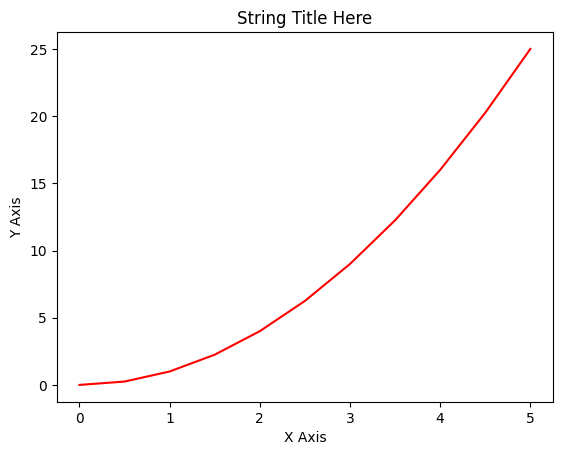

In [68]:
plt.plot(x, y, 'r')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('String Title Here')


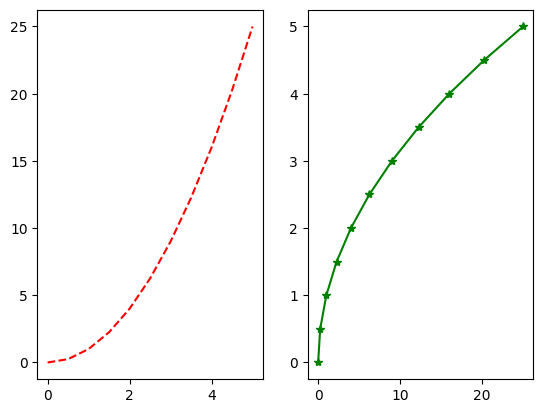

In [70]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Title')

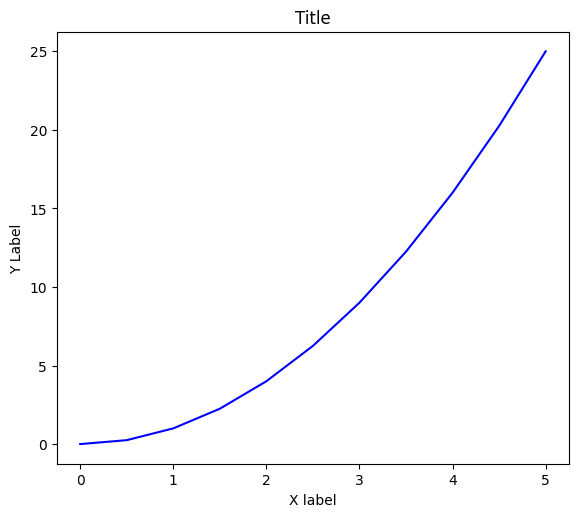

In [80]:
fig = plt.figure() #canvas object
axes = fig.add_axes([0.1, 0.5, 0.8, 0.9])
axes.plot(x, y, 'b')
axes.set_xlabel('X label')
axes.set_ylabel('Y Label')
axes.set_title("Title")


Text(0.5, 1.0, 'Axes 2 title')

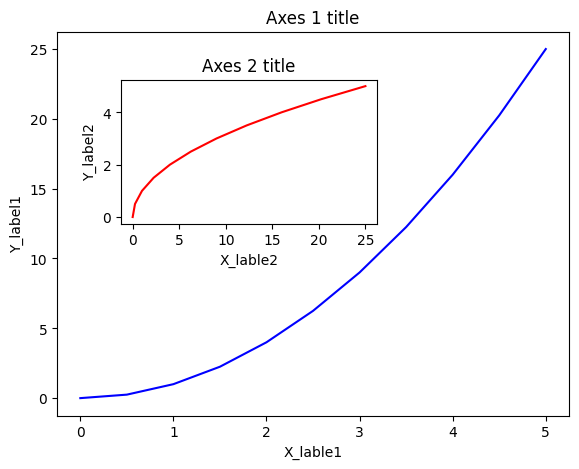

In [81]:
fig = plt.figure()

#lets define two axes for two graphs and specify their locations
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

#lets plot for the first graph
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_lable1')
axes1.set_ylabel('Y_label1')
axes1.set_title('Axes 1 title')

#lets plot for the second graph
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_lable2')
axes2.set_ylabel('Y_label2')
axes2.set_title('Axes 2 title')

Text(0.5, 1.0, 'title')

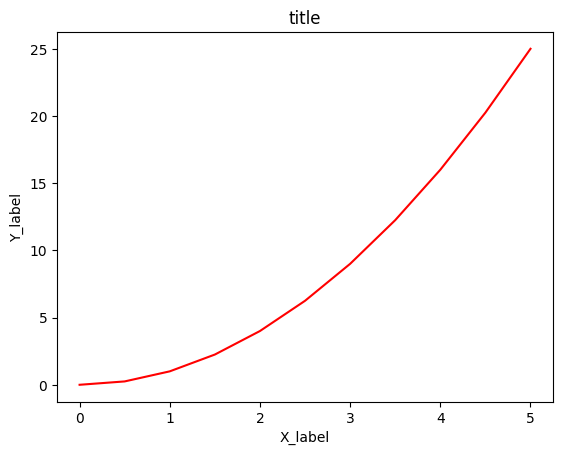

In [82]:
#combine the figure and the axe object

fig, axe = plt.subplots()
axe.plot(x, y, 'r')
axe.set_xlabel('X_label')
axe.set_ylabel('Y_label')
axe.set_title('title')




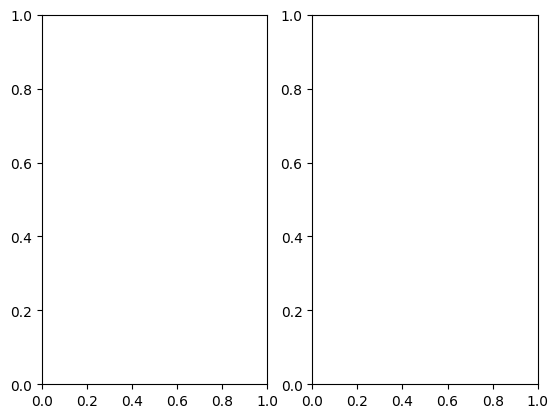

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2)

In [85]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

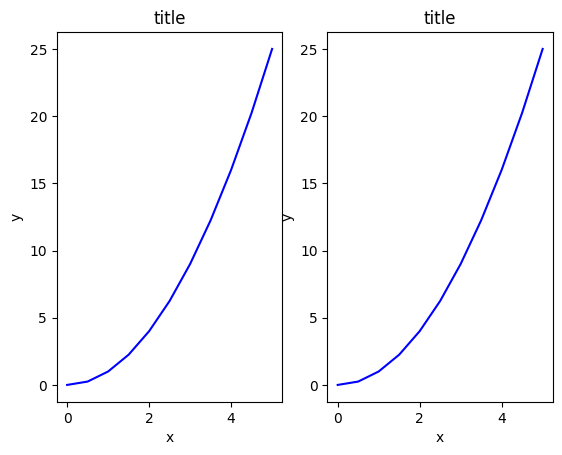

In [86]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig

In [87]:
# matplotlib aspect, figure size, ratio

In [88]:
fig = plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'title')

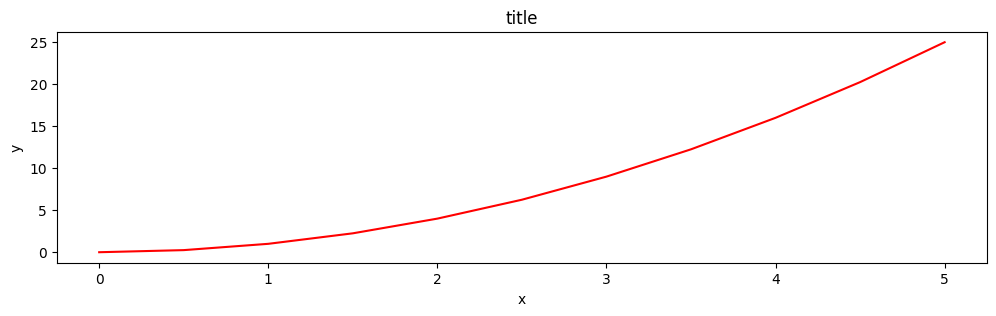

In [89]:
fig, axes = plt.subplots(figsize=(12, 3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

In [90]:
fig.savefig("filename.png")

In [91]:
#legends style

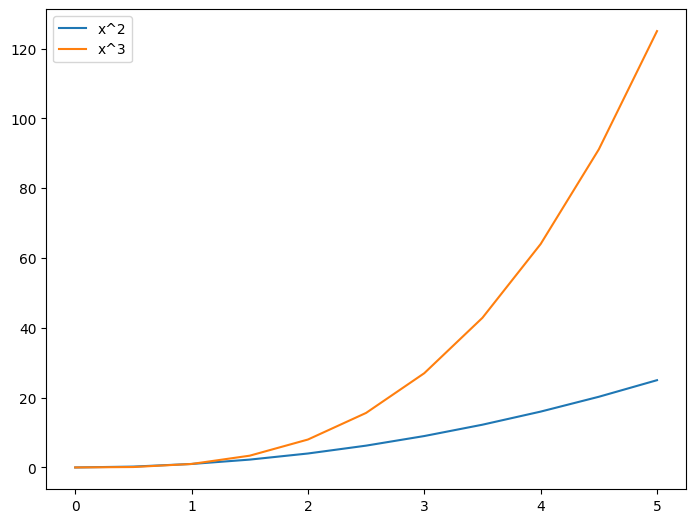

In [92]:
fig = plt.figure()

ax = fig.add_axes ([0, 0, 1, 1])
ax.plot(x, x**2, label="x^2")
ax.plot(x, x**3, label="x^3")
ax.legend()

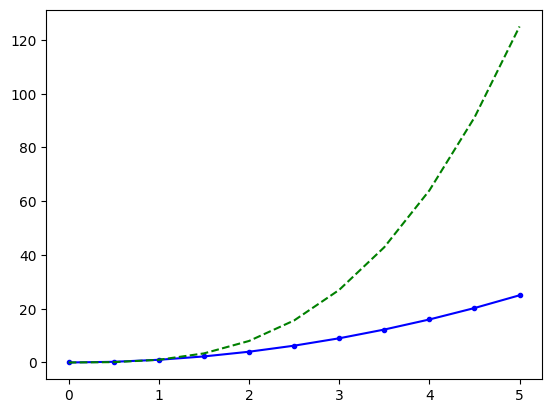

In [94]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')
ax.plot(x, x**3, 'g--')

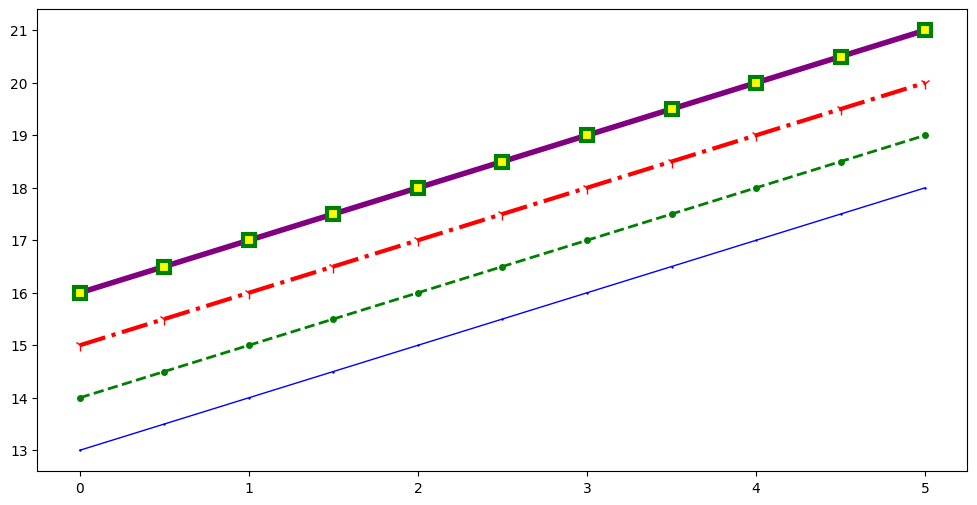

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))

# lets try style
ax.plot(x, x+13, color='blue', lw=1, ls="-", marker="+", markersize=2)
ax.plot(x, x+14, color='green', lw=2, ls="--", marker="o", markersize=4)
ax.plot(x, x+15, color='red', lw=3, ls="-.", marker="1", markersize=8)
ax.plot(x, x+16, color='purple', lw=4, ls="-", marker="s", markersize=8, 
       markerfacecolor='yellow', markeredgewidth=3, markeredgecolor='green')





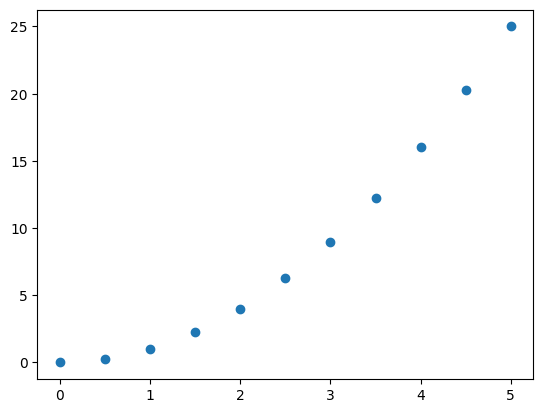

In [101]:
plt.scatter(x, y)

(array([ 6., 13.,  7.,  8.,  9., 10., 17., 10.,  6., 14.]),
 array([ 16. , 113.9, 211.8, 309.7, 407.6, 505.5, 603.4, 701.3, 799.2,
        897.1, 995. ]),
 <BarContainer object of 10 artists>)

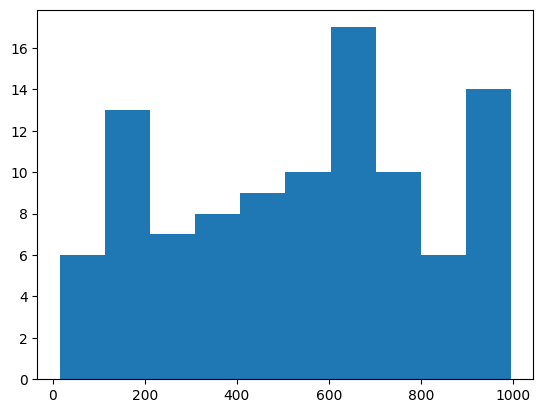

In [102]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)


{'whiskers': [<matplotlib.lines.Line2D at 0x133b13610>,
 'caps': [<matplotlib.lines.Line2D at 0x133b13cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x133b132b0>,
 'medians': [<matplotlib.lines.Line2D at 0x133b1c3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x133b1c730>,
 'means': []}

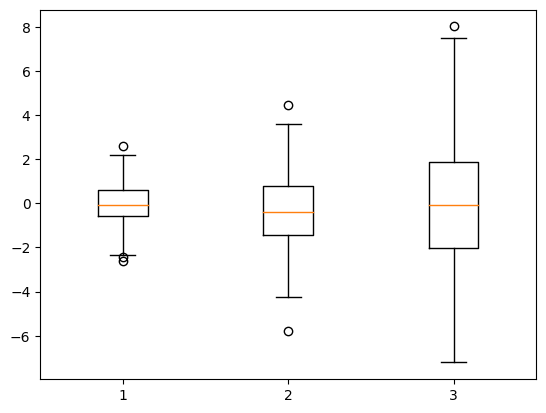

In [104]:
data = [np.random.normal(0, i, 100) for i in range(1, 4)]

plt.boxplot(data, vert=True)

In [ ]:
#!pip install seaborn

In [106]:
import seaborn as sns 

In [107]:
tips = sns.load_dataset('tips')

In [108]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


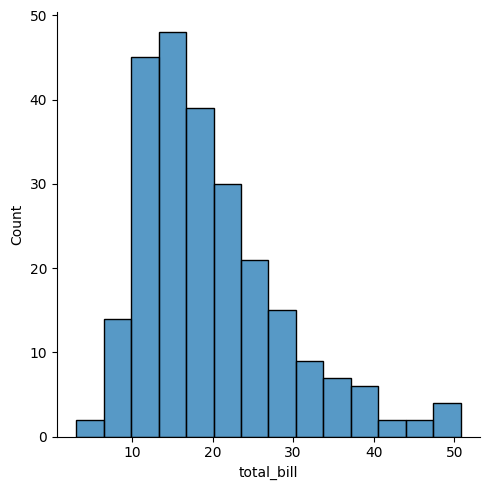

In [109]:
sns.displot(tips['total_bill'])

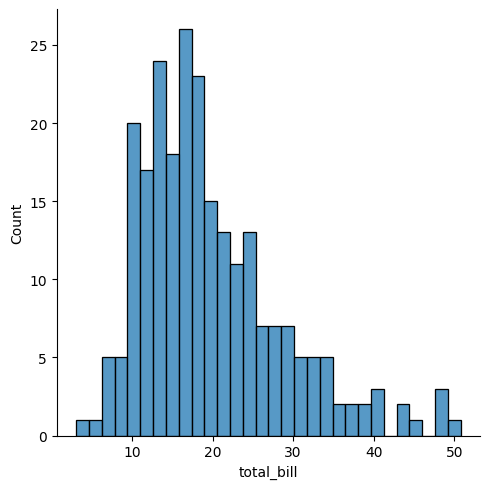

In [110]:
sns.displot(tips['total_bill'], bins=30)

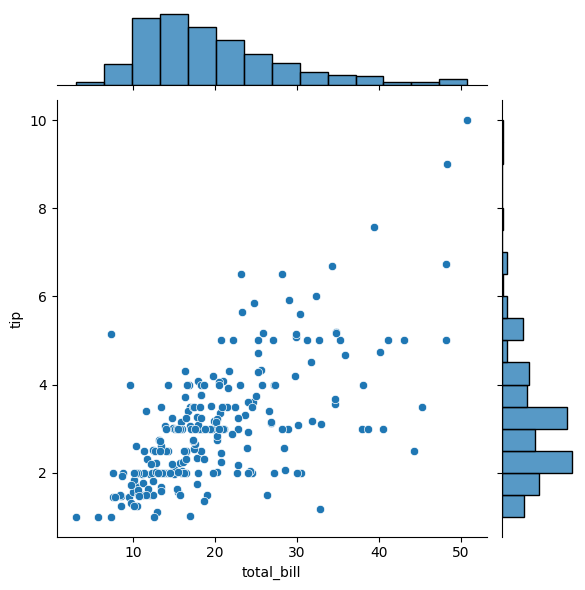

In [111]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

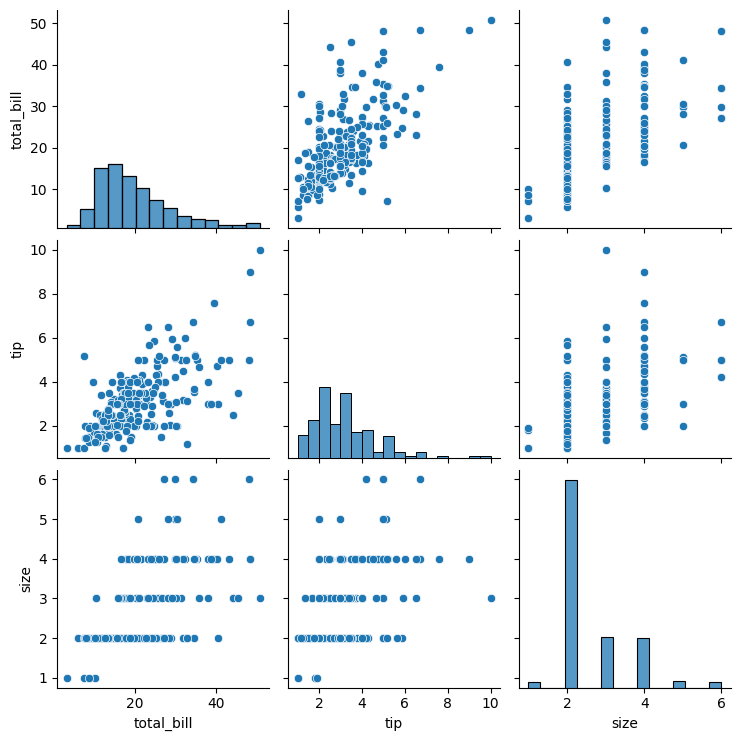

In [112]:
sns.pairplot(tips)

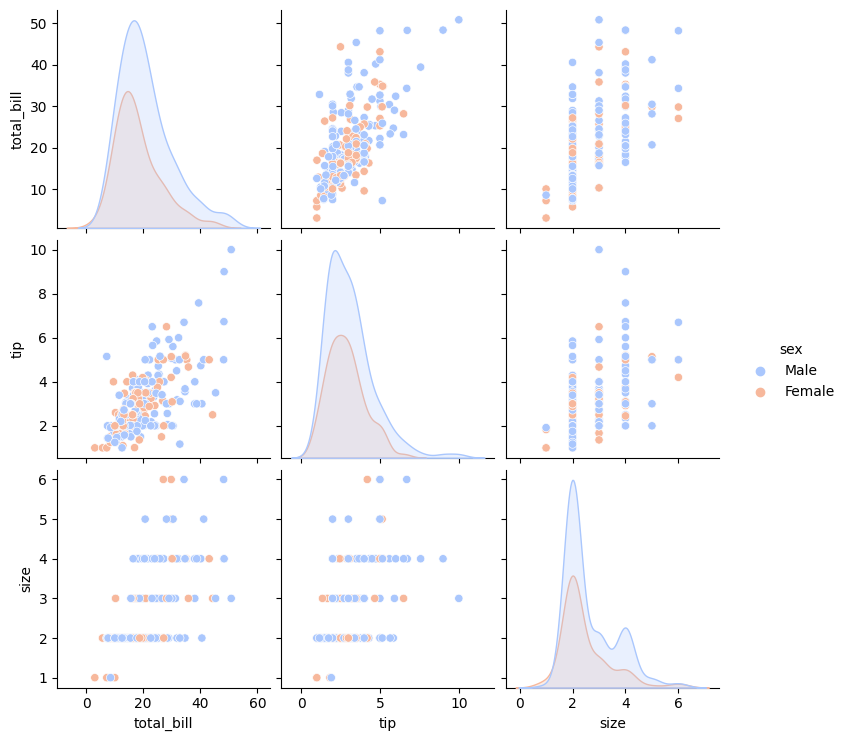

In [114]:
sns.pairplot(tips, hue='sex', palette='coolwarm' )

In [115]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

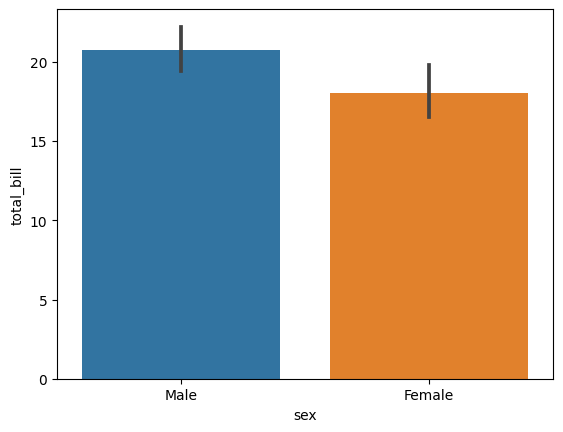

In [116]:
sns.barplot(x='sex', y='total_bill', data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

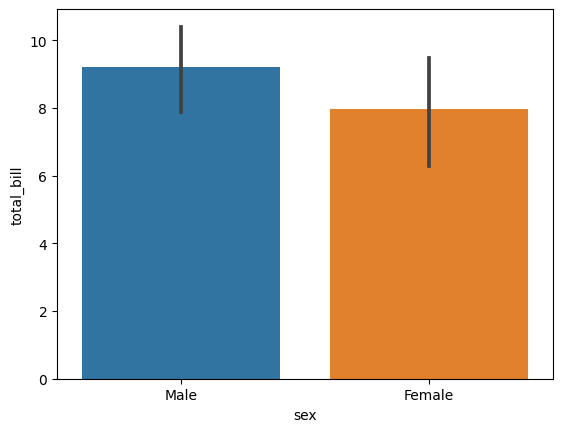

In [117]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

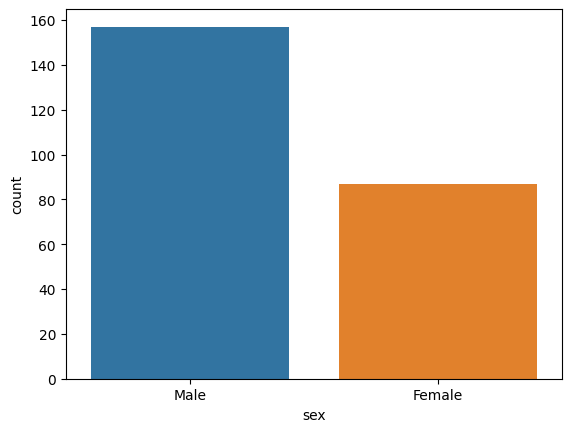

In [118]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

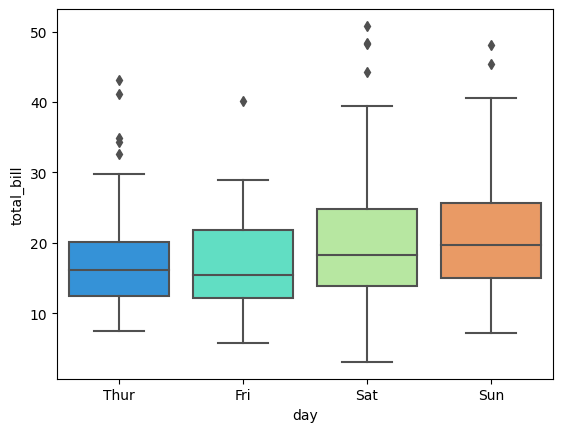

In [119]:
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

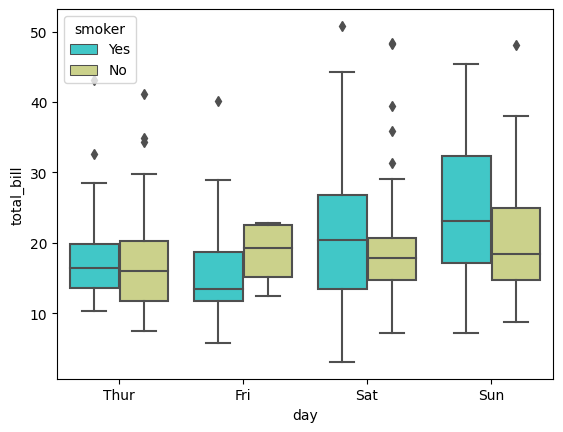

In [120]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

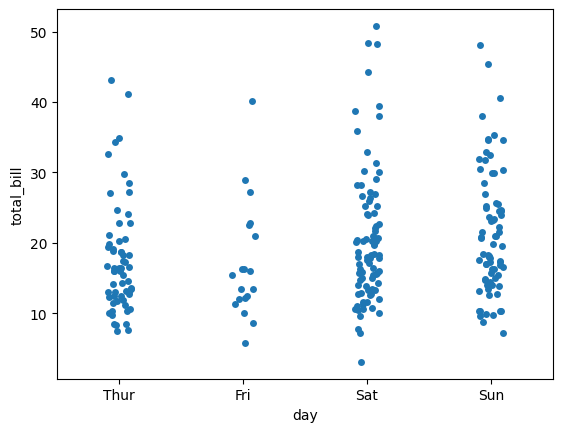

In [121]:
sns.stripplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

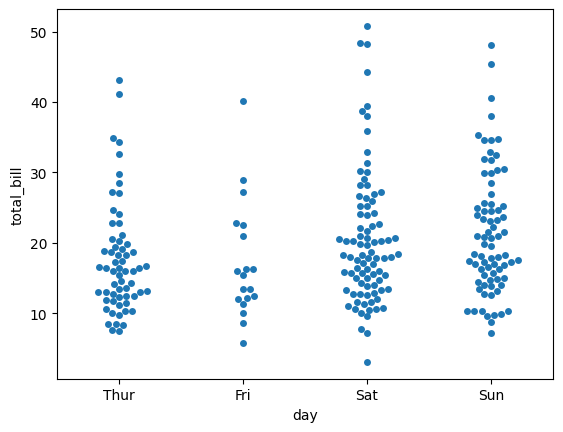

In [122]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

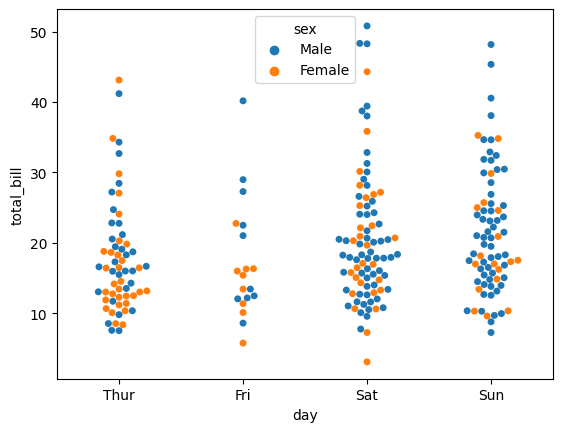

In [123]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)

In [124]:
#matrix plot

In [125]:
tips_corr=tips.corr()

<AxesSubplot:>

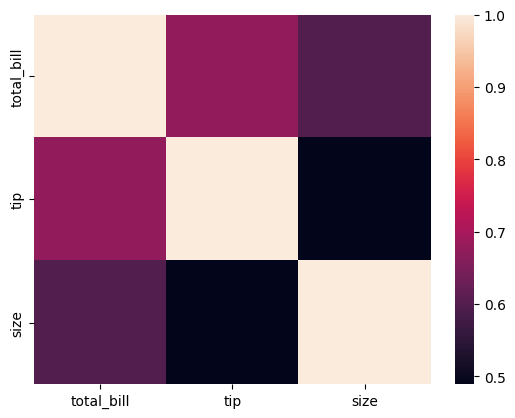

In [126]:
sns.heatmap(tips_corr)

<AxesSubplot:>

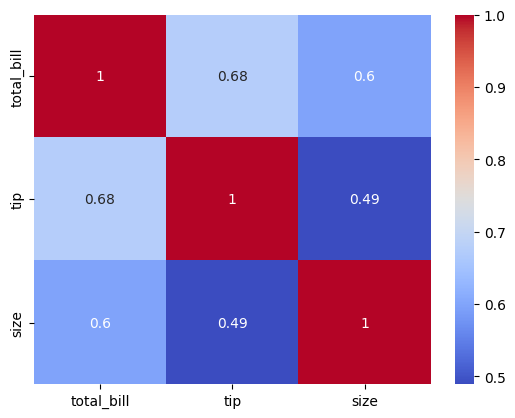

In [127]:
sns.heatmap(tips_corr, cmap='coolwarm', annot=True)

In [128]:
flights=sns.load_dataset('flights')

In [129]:
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [130]:
pivot_flight=flights.pivot_table(values='passengers', index='month', columns='year')

In [131]:
pivot_flight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

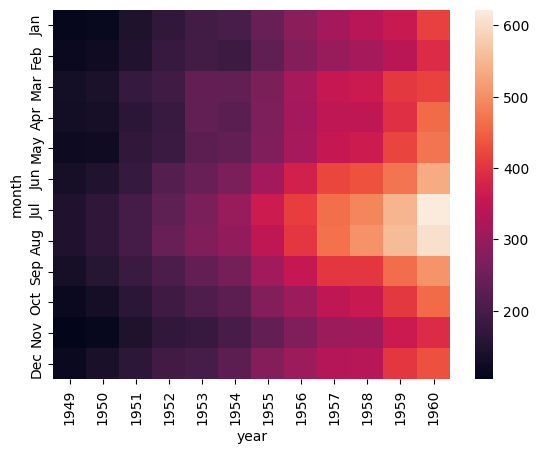

In [132]:
sns.heatmap(pivot_flight)

In [133]:
#linear regression but seaborn

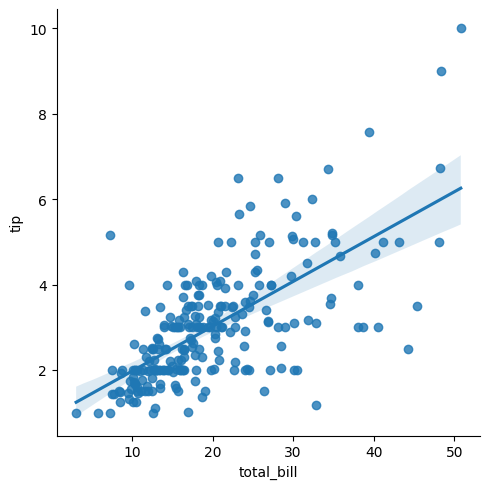

In [134]:
sns.lmplot(x='total_bill', y='tip', data=tips)

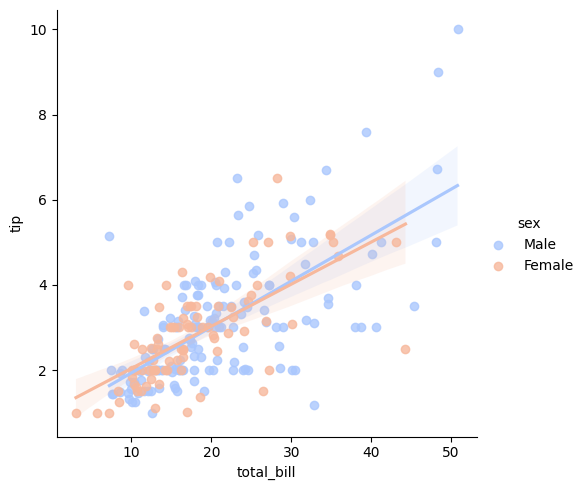

In [136]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, palette='coolwarm')

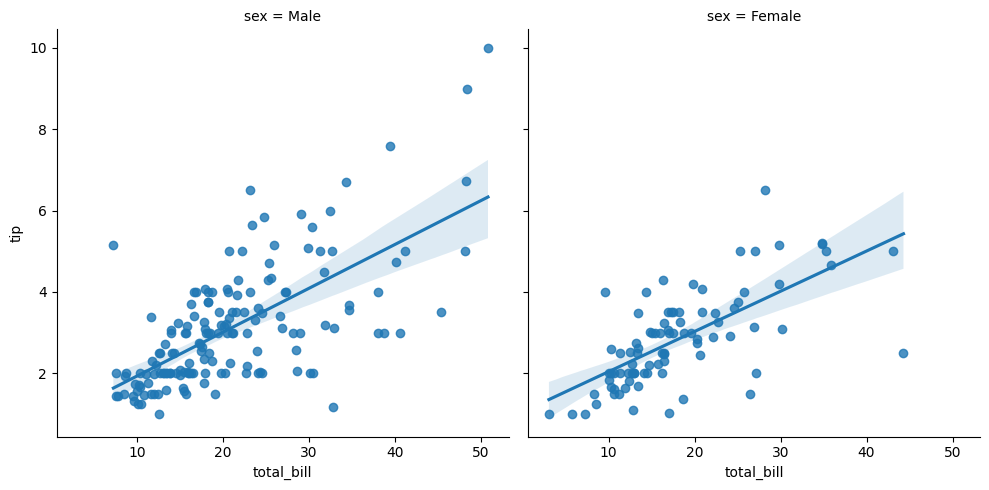

In [137]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

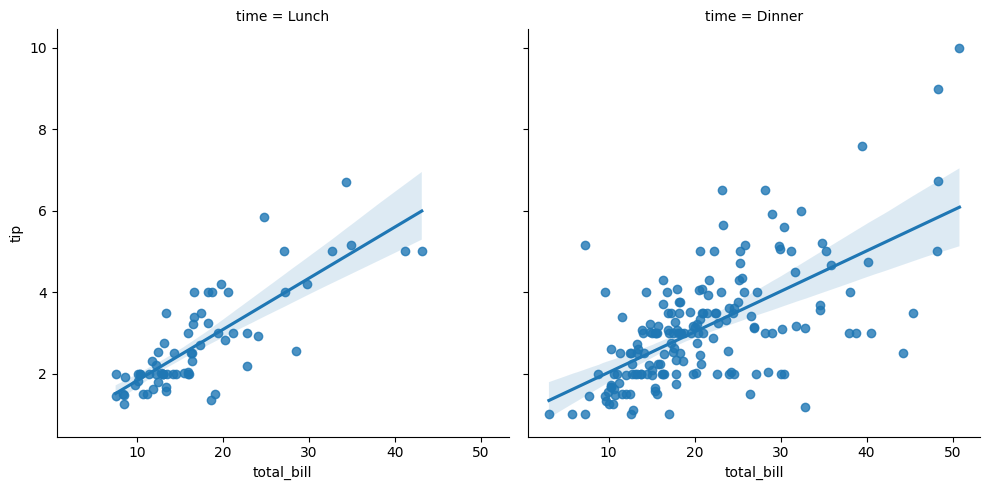

In [138]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='time')

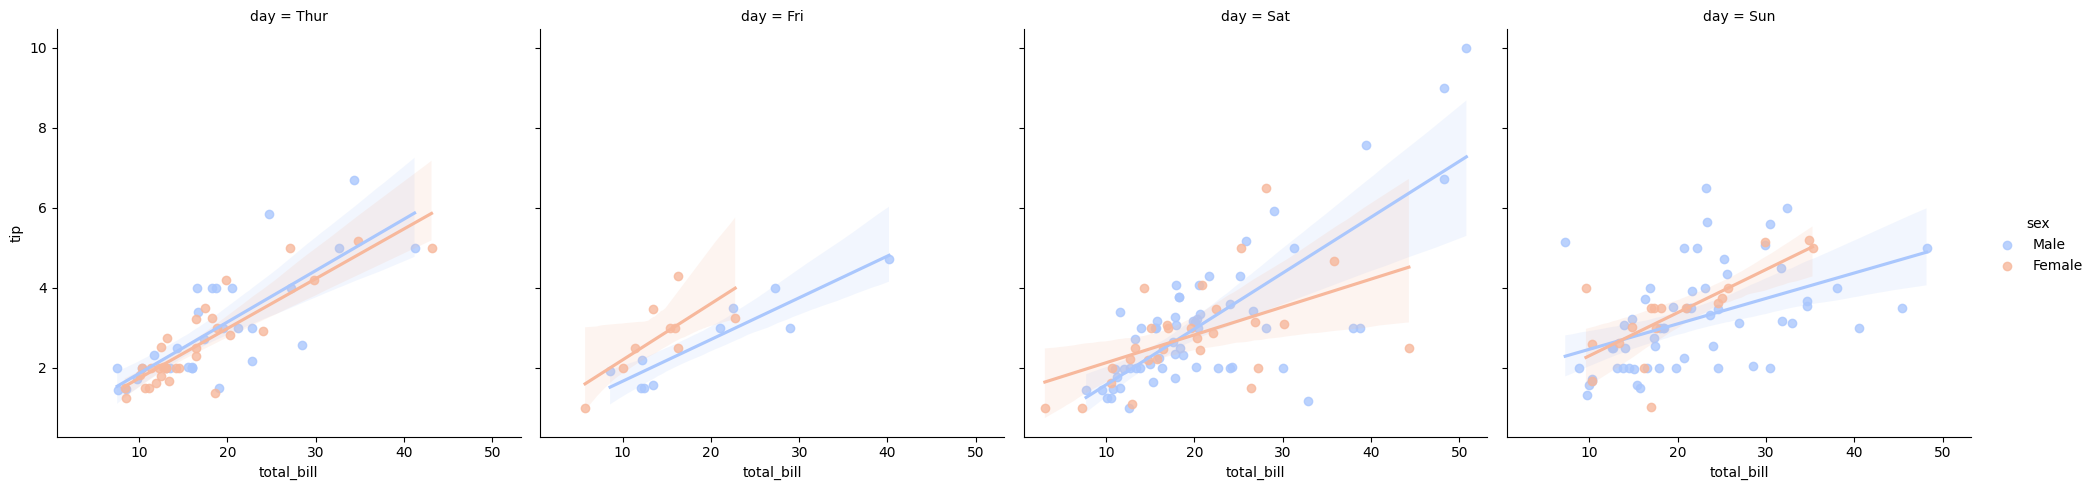

In [139]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm')

<AxesSubplot:xlabel='sex', ylabel='count'>

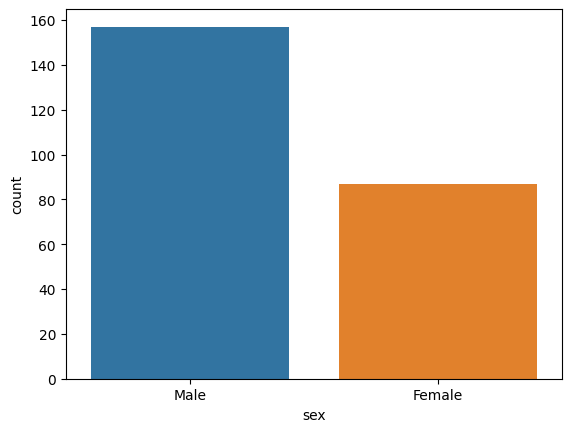

In [145]:
sns.countplot(x='sex', data=tips)


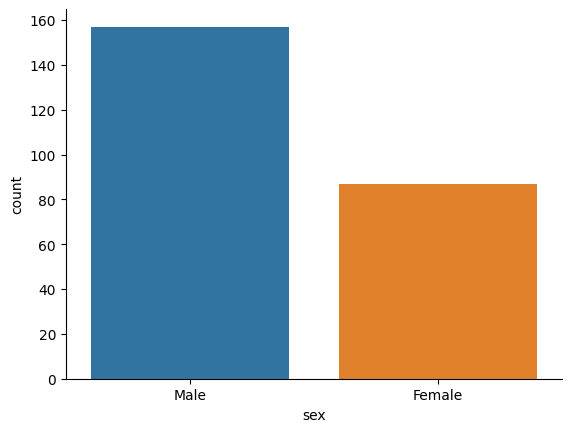

In [146]:
sns.countplot(x='sex', data=tips)

sns.despine()

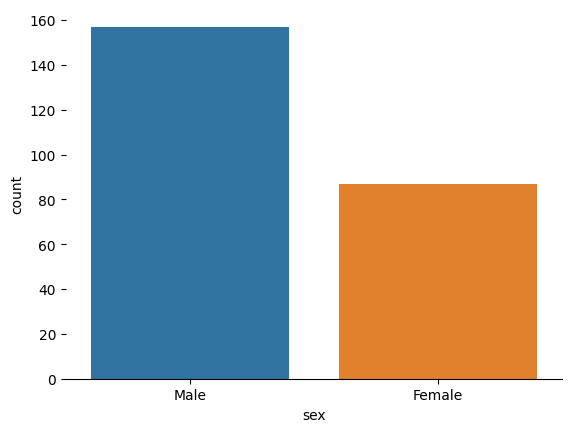

In [147]:
sns.countplot(x='sex', data=tips)
sns.despine(left=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

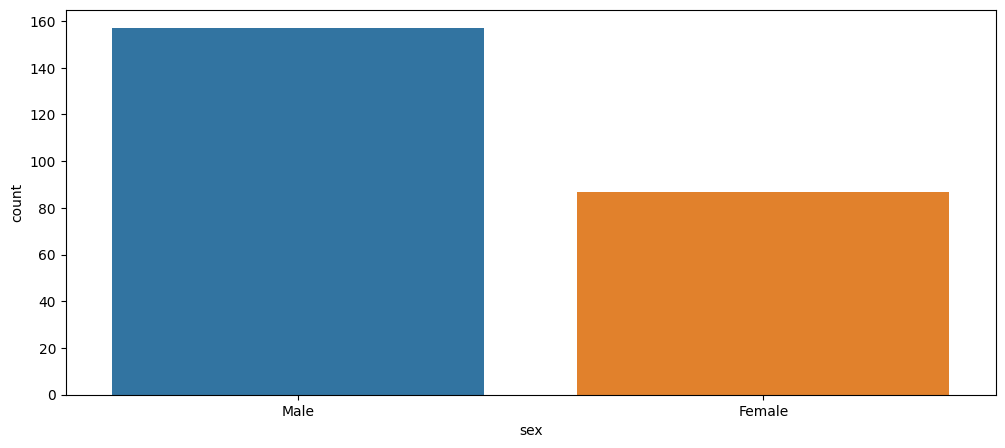

In [150]:
plt.figure(figsize=(12, 5))
sns.countplot(x='sex', data=tips)

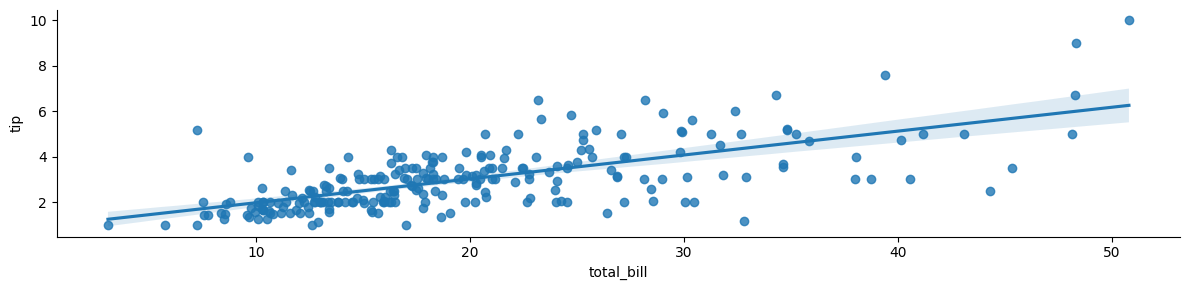

In [153]:
sns.lmplot(x='total_bill', y='tip', aspect=4, height=3, data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

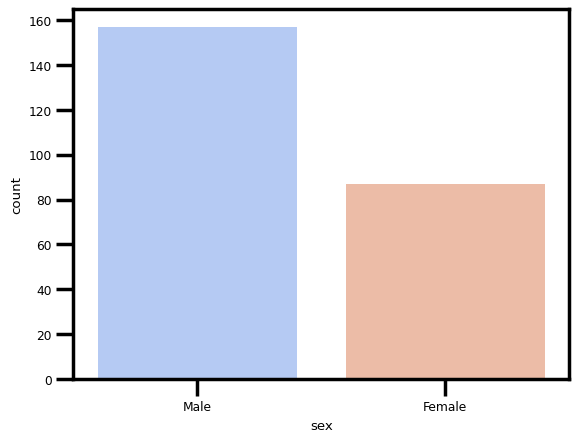

In [160]:
sns.set_context('poster', font_scale=0.4)
sns.countplot(x='sex', data=tips, palette='coolwarm')


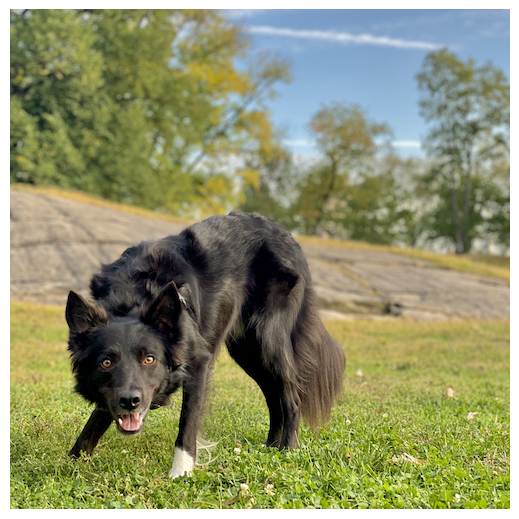

In [165]:
sns.dogplot()